# Analytical estimation

In [1]:
using Analytical, CSV, DataFrames, BenchmarkTools, Plots

**Setting up model. Required to open SFS**

In [2]:
Analytical.changeParameters(gam_neg=-83,gL=10,gH=500,alLow=0.2,alTot=0.2,theta_f=1e-3,theta_mid_neutral=1e-3,al=0.184,be=0.000402,B=0.999,bRange=append!(collect(0.2:0.05:0.95),0.999),pposL=0.001,pposH=0,N=1000,n=661,Lf=10^6,rho=0.001,TE=5.0,convoluteBinomial=true)

Dict{Float64,Array{Float64,2}} with 17 entries:
  0.95  => [1.0 0.498589 … 0.0 0.0; 0.0 0.347096 … 0.0 0.0; … ; 0.0 0.0 … 0.347…
  0.3   => [1.0 0.110232 … 0.0 0.0; 0.0 0.243282 … 0.0 0.0; … ; 0.0 0.0 … 0.243…
  0.45  => [1.0 0.229993 … 0.0 0.0; 0.0 0.33821 … 0.0 0.0; … ; 0.0 0.0 … 0.3382…
  0.25  => [1.0 0.0708885 … 0.0 0.0; 0.0 0.187805 … 0.0 0.0; … ; 0.0 0.0 … 0.18…
  0.35  => [1.0 0.151084 … 0.0 0.0; 0.0 0.28574 … 0.0 0.0; … ; 0.0 0.0 … 0.2857…
  0.7   => [1.0 0.388826 … 0.0 0.0; 0.0 0.367425 … 0.0 0.0; … ; 0.0 0.0 … 0.367…
  0.85  => [1.0 0.459381 … 0.0 0.0; 0.0 0.357446 … 0.0 0.0; … ; 0.0 0.0 … 0.357…
  0.2   => [1.0 0.0365477 … 0.0 0.0; 0.0 0.121093 … 0.0 0.0; … ; 0.0 0.0 … 0.12…
  0.9   => [1.0 0.479674 … 0.0 0.0; 0.0 0.35249 … 0.0 0.0; … ; 0.0 0.0 … 0.3524…
  0.65  => [1.0 0.361565 … 0.0 0.0; 0.0 0.367966 … 0.0 0.0; … ; 0.0 0.0 … 0.367…
  0.8   => [1.0 0.437574 … 0.0 0.0; 0.0 0.361772 … 0.0 0.0; … ; 0.0 0.0 … 0.361…
  0.5   => [1.0 0.266425 … 0.0 0.0; 0.0 0.352567 … 0.0 0.0; …

**Opening files**

In [8]:
path= "/home/jmurga/mktest/data/";suffix="txt";
files = path .* filter(x -> occursin(suffix,x), readdir(path))

empiricalValues = Analytical.parseSfs(data=files[1],output="testData.tsv",sfsColumns=[3,5],divColumns=[6,7])

ErrorException: function parseSfs does not accept keyword arguments

In [6]:
function summStats(iter,data)

    for i in 1:iter
        # for j in adap.bRange
        for j in [0.999]

            Analytical.changeParameters(gam_neg=-rand(80:200),gL=rand(10:20),gH=rand(100:500),alLow=rand(collect(0.1:0.1:0.4)),alTot=rand(collect(0.1:0.1:0.4)),theta_f=1e-3,theta_mid_neutral=1e-3,al=0.184,be=0.000402,B=j,bRange=bRange=append!(collect(0.2:0.05:0.95),0.999),pposL=0.001,pposH=0,N=1000,n=661,Lf=10^6,rho=0.001,TE=5.0,convoluteBinomial=false)

            Analytical.set_theta_f()
            theta_f = adap.theta_f
            adap.B = 0.999
            Analytical.set_theta_f()
            Analytical.setPpos()
            adap.theta_f = theta_f
            adap.B = j

            x,y,z= Analytical.alphaByFrequencies(adap.gL,adap.gH,adap.pposL,adap.pposH,data,"both")
            CSV.write("/home/jmurga/prior.csv", DataFrame(z), delim='\t', append=true)
        end
    end
    
end

summStats (generic function with 1 method)

In [4]:
@btime summStats(1,empiricalValues)

UndefVarError: UndefVarError: summStats not defined

In [5]:
x,y,z= Analytical.alphaByFrequencies(adap.gL,adap.gH,adap.pposL,adap.pposH,empiricalValues,"both")

UndefVarError: UndefVarError: empiricalValues not defined

In [6]:
using LaTexString

ArgumentError: ArgumentError: Package LaTexString not found in current path:
- Run `import Pkg; Pkg.add("LaTexString")` to install the LaTexString package.


In [10]:
Plots.gr()
Plots.theme(:wong2)

Plots.plot(collect(1:size(x,1)),hcat(x,y),
    legend = :topright,
    xlabel = "Derived Alleles Counts",
    ylabel = L"$\alpha",
    label = [L"$\alpha$ accounting positive alleles" L"$\alpha$ non accounting positive alleles"],
    lw = 0.5)

LoadError: syntax: invalid interpolation syntax: "$\"

# ABC

In [2]:
using CSV, GZip, StatsPlots, Plots

In [12]:
using Plots.PlotMeasures

In [6]:
files = filter(x -> occursin("vipOut",x), readdir("/home/jmurga/"))
openFiles(f) = convert(Matrix,CSV.read(GZip.open("/home/jmurga/"*"/"*f),header=false))

openFiles (generic function with 1 method)

In [7]:
posteriors = files .|> openFiles 

2-element Array{Array{Float64,2},1}:
 [8481.98 9544.35 … 0.527251 0.535285; 10203.1 8294.87 … 0.326473 0.330865; … ; 9783.54 8076.75 … 0.252699 0.256436; 9165.87 8969.12 … 0.377023 0.40825]
 [8481.98 9544.35 … 0.527251 0.535285; 10203.1 8294.87 … 0.326473 0.330865; … ; 9783.54 8076.75 … 0.252699 0.256436; 9165.87 8969.12 … 0.377023 0.40825]

In [17]:
using LaTeXStrings

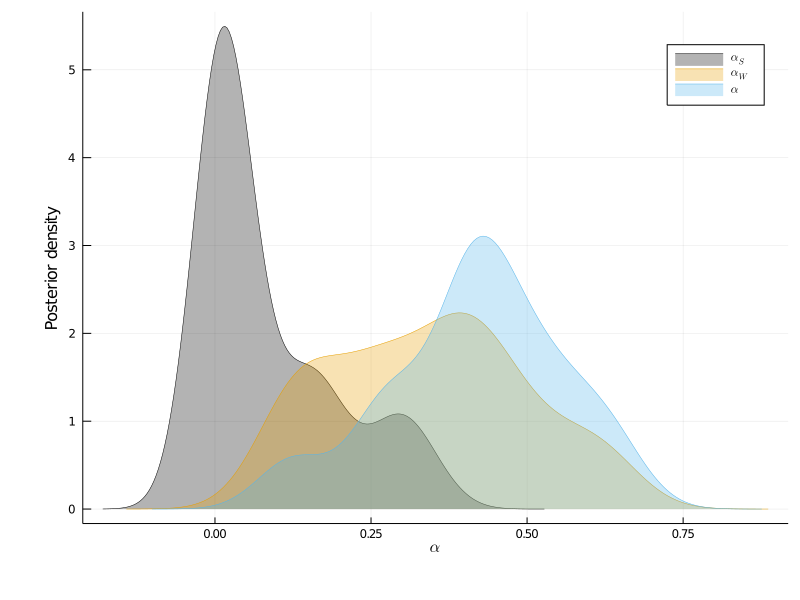

In [24]:
Plots.gr()
Plots.theme(:wong2)

p1 = StatsPlots.density(posteriors[1][:,[5,6,7]],legend = :topright, fill=(0, 0.3),xlabel = L"\alpha",label = [L"\alpha_S" L"\alpha_W" L"\alpha"],ylabel = "Posterior density", lw = 0.5,fmt = :svg,bottom_margin=10mm,left_margin=10mm,size=(800,600));p1